# 数据预处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values
from pdpbox import pdp,info_plots #for partial plots
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [2]:
dt = pd.read_csv("data/archive/heart.csv")

In [3]:
dt.head(10) #输出前十行内容查看数据

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
5   0     2       1  
6   3     1       0  
7   1     3       0  
8   0     3       0  
9   2     2       0

age:人的年龄

sex:这个人的性别(1 =男性，0 =女性)

cp:胸痛经历(值1:典型心绞痛，值2:非典型心绞痛，值3:非心绞痛，值4:无症状)

trestbps:患者入院时的静息血压(毫米汞柱)

胆固醇:人的胆固醇测量值，单位为毫克/分升

fbs:人的空腹血糖(> 120mg /dl, 1 = true;0 = false)

restecg:静息心电图测量(0 =正常，1 = ST-T波异常，2 =根据Estes标准显示可能或明确的左心室肥厚)

心率:人达到的最大心率

exang:运动诱发心绞痛(1 = yes;0 = no)

oldpeak:运动相对于休息引起的ST降低(ST与心电图图上的位置有关)。

斜率:峰值运动ST段的斜率(值1:向上倾斜，值2:平坦，值3:向下倾斜)

ca:主要血管数目(0-3)

thal:一种叫做地中海贫血的血液疾病(3 =正常;6 =固定缺陷;7 =可逆缺陷)

目标:心脏病(0 =否，1 =是)

In [4]:
## 更改列的名称，使得它更加具体，而不再是缩写的形式
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [5]:
## 改变分类变量的值，以便稍后更好地解释，
dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'

# 将 'sex' 列中的 0 替换为 'female'，1 替换为 'male'，以便更清楚地表示性别。
# 将 'chest_pain_type' 列中的 1 替换为 'typical angina'，2 替换为 'atypical angina'，以此类推，以描述不同类型的胸痛。

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'

dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

In [6]:
dt.head()

age     sex chest_pain_type  resting_blood_pressure  cholesterol  \
0   52    male               0                     125          212   
1   53    male               0                     140          203   
2   70    male               0                     145          174   
3   61    male               0                     148          203   
4   62  female               0                     138          294   

     fasting_blood_sugar               rest_ecg  max_heart_rate_achieved  \
0    lower than 120mg/ml  ST-T wave abnormality                      168   
1  greater than 120mg/ml                 normal                      155   
2    lower than 120mg/ml  ST-T wave abnormality                      125   
3    lower than 120mg/ml  ST-T wave abnormality                      161   
4  greater than 120mg/ml  ST-T wave abnormality                      106   

  exercise_induced_angina  st_depression   st_slope  num_major_vessels  \
0                      no            1.0       flat                  2   
1                     yes            3.1          0                  0   
2                     yes            2.6          0                  0   
3                      no            0.0       flat                  1   
4                      no            1.9  upsloping                  3   

         thalassemia  target  
0  reversable defect       0  
1  reversable defect       0  
2  reversable defect       0  
3  reversable defect       0  
4       fixed defect       0

In [7]:
dt.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [8]:
# 其中一些并不完全正确。下面的代码将它们转换为分类变量
dt['sex'] = dt['sex'].astype('object')
dt['chest_pain_type'] = dt['chest_pain_type'].astype('object')
dt['fasting_blood_sugar'] = dt['fasting_blood_sugar'].astype('object')
dt['rest_ecg'] = dt['rest_ecg'].astype('object')
dt['exercise_induced_angina'] = dt['exercise_induced_angina'].astype('object')
dt['st_slope'] = dt['st_slope'].astype('object')
dt['thalassemia'] = dt['thalassemia'].astype('object')

In [9]:
dt.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [10]:
# 对于分类变量，我们需要创建虚拟变量（哑变量）。
# 进行独热编码对 DataFrame dt 中的分类变量进行独热编码处理
dt = pd.get_dummies(dt, drop_first=True)

In [11]:
dt.head()

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0   52                     125          212                      168   
1   53                     140          203                      155   
2   70                     145          174                      125   
3   61                     148          203                      161   
4   62                     138          294                      106   

   st_depression  num_major_vessels  target  sex_male  \
0            1.0                  2       0         1   
1            3.1                  0       0         1   
2            2.6                  0       0         1   
3            0.0                  1       0         1   
4            1.9                  3       0         0   

   chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   

   chest_pain_type_typical angina  fasting_blood_sugar_lower than 120mg/ml  \
0                               0                                        1   
1                               0                                        0   
2                               0                                        1   
3                               0                                        1   
4                               0                                        0   

   rest_ecg_left ventricular hypertrophy  rest_ecg_normal  \
0                                      0                0   
1                                      0                1   
2                                      0                0   
3                                      0                0   
4                                      0                0   

   exercise_induced_angina_yes  st_slope_flat  st_slope_upsloping  \
0                            0              1                   0   
1                            1              0                   0   
2                            1              0                   0   
3                            0              1                   0   
4                            0              0                   1   

   thalassemia_fixed defect  thalassemia_normal  thalassemia_reversable defect  
0                         0                   0                              1  
1                         0                   0                              1  
2                         0                   0                              1  
3                         0                   0                              1  
4                         1                   0                              0

# 建模

In [25]:
X_train, X_test, y_train, y_test = train_test_split(dt.drop('target', 1), dt['target'], test_size = .2, random_state=10) #split the data
# dt.drop('target', 1) 选择了除了目标变量 'target' 之外的所有列作为特征集 X，这些特征被用于训练模型。
# dt['target'] 选取了目标变量 'target' 作为输出变量 y，它是我们希望模型预测的目标。
# test_size = .2 指定了测试集占总数据的比例为 20%，即将数据按照 8:2 的比例分为训练集和测试集。
# random_state=10 是随机种子，它确保每次运行代码时得到的随机拆分都是相同的，有助于结果的可重现性。

### 运行完上面这一步，可以直接跳到模型比较那一部分去运行

# 模型评估

In [20]:
# 对测试集进行预测
y_predict = model.predict(X_test) # 得到标签预测
y_pred_quant = model.predict_proba(X_test)[:, 1] # 得到概率，返回的是每个样本属于第二类（1）的概率值，即得到第二列
y_pred_bin = model.predict(X_test) # 存储模型对测试集数据的分类预测结果，是标签预测不是概率

In [21]:
# 混淆矩阵
rf_confusion_matrix = confusion_matrix(y_test, y_pred_bin)
rf_confusion_matrix

array([[ 86,  11],
       [  8, 100]], dtype=int64)

心脏病预测问题本质上是一个二分类任务，而F1-Score是一个在二分类任务中经常用来衡量模型的精准度，在计算F1-Score之前，要先计算Precision与Recall

$$
\text { Precision }=\frac{T P}{T P+F P}
$$

$$
\text { Recall }=\frac{T P}{T P+F N}
$$

$$
F 1=\frac{2}{\frac{1}{P \text { recision }}+\frac{1}{\text { Recall }}}=\frac{2 * \text { Precision } * \text { Recall }}{\text { Precision }+ \text { Recall }}=\frac{2 P R}{P+R}
$$
precision越大，F1越大；Recall越大，F1越大。

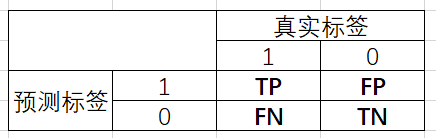

In [22]:
total=sum(sum(rf_confusion_matrix))
TP = rf_confusion_matrix[0,0]
FP = rf_confusion_matrix[0,1]
FN = rf_confusion_matrix[1,0]
TN = rf_confusion_matrix[1,1]

Precision = TP/(TP + FP)
print('Precision : ', Precision )

Recall = TP/(TP+FN)
print('Recall : ',Recall)

F1 = 2 * Precision * Recall / (Precision + Recall)
print('F1-Score : ',F1)

Precision :  0.8865979381443299
Recall :  0.9148936170212766
F1-Score :  0.900523560209424


ROC曲线是一种用于表示分类模型性能的图形工具。它通过将真阳性率（True Positive Rate，TPR）和假阳性率（False Positive Rate，FPR）作为横纵坐标来描绘分类器在不同阈值下的性能。其中，真阳性率也被称为敏感性（Sensitivity）或召回率（Recall）；假阳性率（False Positive Rate，FPR）是指在所有实际为负例的样本中，模型错误地预测为正例的样本比例，也被称为特异性（specificity）

\begin{align}
Sensitivity = \frac{True\:Positives}{True\:Positives + False\:Negatives}
\end{align}

\begin{align}
Specificity = \frac{True\:Negatives}{True\:Negatives + False\:Positives}
\end{align}

AUC（ROC曲线下面积）是ROC曲线下的面积，用于衡量分类器性能。AUC值越接近1，表示分类器性能越好；反之，AUC值越接近0，表示分类器性能越差。在实际应用中，我们常常通过计算AUC值来评估分类器的性能。

In [23]:
# 为了绘制ROC曲线，首先计算Sensitivity与Specificity
total=sum(sum(rf_confusion_matrix))

sensitivity = rf_confusion_matrix[0,0]/(rf_confusion_matrix[0,0]+rf_confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = rf_confusion_matrix[1,1]/(rf_confusion_matrix[1,1]+rf_confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9148936170212766
Specificity :  0.9009009009009009


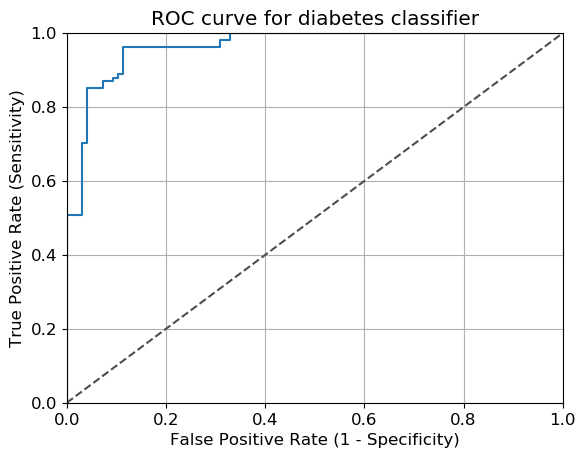

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [26]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_quant)
print(auc_score)

0.9644902634593356


综上：F1-Score =  0.9 AUC_Score = 0.96 可以看到预测的效果非常不错。 到现在为此，我们已经大体上完成了这个任务。

之后，对于一个要监测的对象，我们需要做的，就是通过可穿戴式的设备，获取这名对象的生理指标，我们应当获取如下的生理指标

trestbps:患者入院时的静息血压(毫米汞柱)

胆固醇:人的胆固醇测量值，单位为毫克/分升

fbs:人的空腹血糖(> 120mg /dl, 1 = true;0 = false)

restecg:静息心电图测量(0 =正常，1 = ST-T波异常，2 =根据Estes标准显示可能或明确的左心室肥厚)

心率:人达到的最大心率

oldpeak:运动相对于休息引起的ST降低(ST与心电图图上的位置有关)。

斜率:峰值运动ST段的斜率(值1:向上倾斜，值2:平坦，值3:向下倾斜)

ca:主要血管数目(0-3)

然后通过App程序引导或者是问卷的形式，获取如下指标

age:人的年龄

sex:这个人的性别(1 =男性，0 =女性)

cp:胸痛经历(值1:典型心绞痛，值2:非典型心绞痛，值3:非心绞痛，值4:无症状)

exang:运动诱发心绞痛(1 = yes;0 = no)

thal:一种叫做地中海贫血的血液疾病(3 =正常;6 =固定缺陷;7 =可逆缺陷)

# 模型对比

对于常见的分类任务，列举几个比较常见的分类模型


    逻辑回归 Logistic Regression
    朴素贝叶斯 Naive Bayes
    RF随机森林 Random Forest Classifier
    极端梯度boost Extreme Gradient Boost
    K近邻 K-Nearest Neighbour（这个一般用于无标签的聚类，这次不使用）
    决策树 Decision Tree（RF随机森林就是多个决策树的集成学习）
    支持向量机 Support Vector Machine


In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [15]:
# 封装一个函数减轻任务量
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluate_model_performance(y_true, y_pred,y_pred_q):
    # 计算混淆矩阵
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # 计算 TP、FP、FN、TN
    TP = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TN = conf_matrix[1, 1]

    # 计算 Precision、Recall、F1 Score
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1 = 2 * Precision * Recall / (Precision + Recall)

    # 计算 ROC AUC Score
    auc_score = roc_auc_score(y_true, y_pred_q)
    
    # 计算 ROC 曲线指标
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_q)
    
    # 绘制 ROC 曲线
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    plt.show()

    return {'F1-Score': F1, 'ROC AUC Score': auc_score}




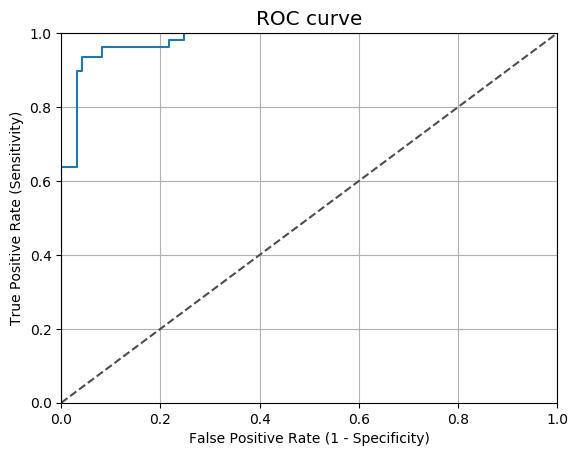

{'F1-Score': 0.9278350515463918, 'ROC AUC Score': 0.9795723558610157}


In [16]:
# RF随机森林
model = RandomForestClassifier(max_depth=6) # max_depth为5时AUC值为0.93，最大深度变为6时提升了整整0.05，并且F1分数也得到了提升
model.fit(X_train, y_train) 
y_predict = model.predict(X_test) 
y_pred_quant = model.predict_proba(X_test)[:, 1] 
y_pred_bin = model.predict(X_test) 
# 调用函数并获取结果
results = evaluate_model_performance(y_test, y_pred_bin,y_pred_quant)
print(results)

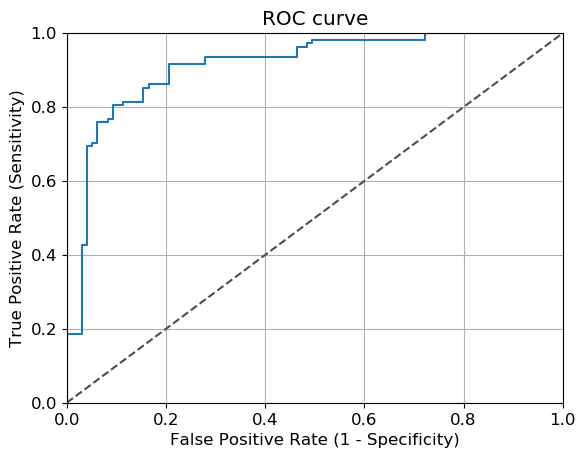

{'F1-Score': 0.8350515463917526, 'ROC AUC Score': 0.9131347842688049}


In [16]:
# 逻辑回归
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
y_predict = model.predict(X_test) 
y_pred_quant = model.predict_proba(X_test)[:, 1] 
y_pred_bin = model.predict(X_test) 
# 调用函数并获取结果
results = evaluate_model_performance(y_test, y_pred_bin,y_pred_quant)
print(results)

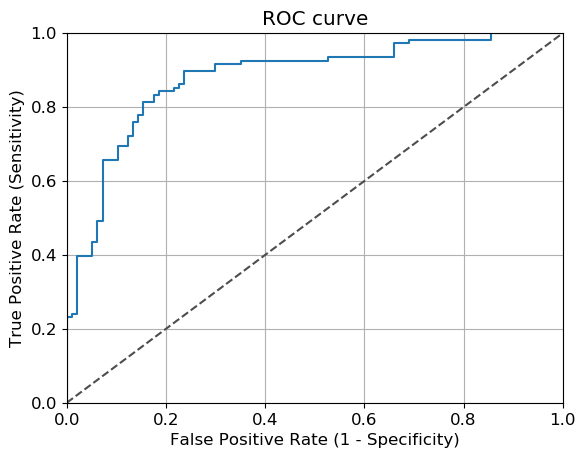

{'F1-Score': 0.8144329896907216, 'ROC AUC Score': 0.8804887361588393}


In [17]:
# 朴素贝叶斯
model = GaussianNB()
model.fit(X_train,y_train)
y_predict = model.predict(X_test) 
y_pred_quant = model.predict_proba(X_test)[:, 1] 
y_pred_bin = model.predict(X_test) 
# 调用函数并获取结果
results = evaluate_model_performance(y_test, y_pred_bin,y_pred_quant)
print(results)

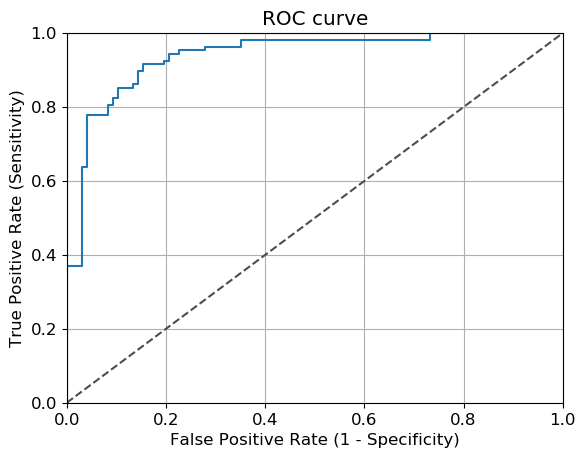

{'F1-Score': 0.8571428571428571, 'ROC AUC Score': 0.9392898052691867}


In [18]:
# 极端梯度提升
model = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
model.fit(X_train, y_train)
y_predict = model.predict(X_test) 
y_pred_quant = model.predict_proba(X_test)[:, 1] 
y_pred_bin = model.predict(X_test) 
# 调用函数并获取结果
results = evaluate_model_performance(y_test, y_pred_bin,y_pred_quant)
print(results)

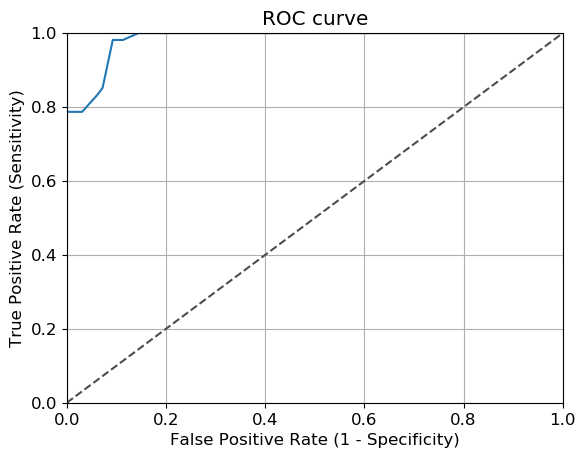

{'F1-Score': 0.935483870967742, 'ROC AUC Score': 0.9835337915234823}


In [19]:
# 决策树
model = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
model.fit(X_train, y_train)
y_predict = model.predict(X_test) 
y_pred_quant = model.predict_proba(X_test)[:, 1] 
y_pred_bin = model.predict(X_test) 
# 调用函数并获取结果
results = evaluate_model_performance(y_test, y_pred_bin,y_pred_quant)
print(results)

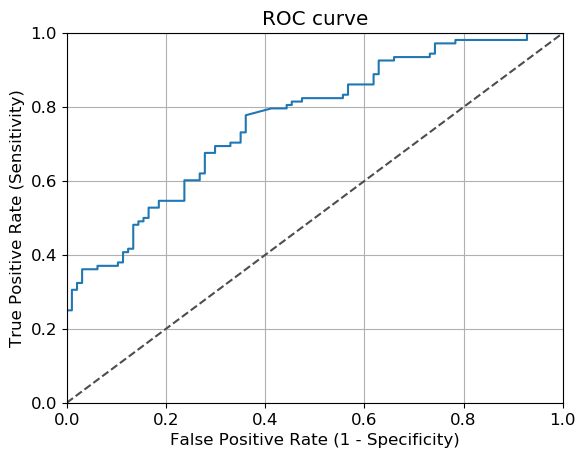

{'F1-Score': 0.64, 'ROC AUC Score': 0.7647957235586103}


In [20]:
# 支持向量机
model = SVC(kernel='rbf', C=2, probability=True)
model.fit(X_train, y_train)
y_predict = model.predict(X_test) 
y_pred_quant = model.predict_proba(X_test)[:, 1] 
y_pred_bin = model.predict(X_test) 
# 调用函数并获取结果
results = evaluate_model_performance(y_test, y_pred_bin,y_pred_quant)
print(results)

综上，基于F1分数与AUC分数的综合考虑以及可解释性，我们采用RF随机森林

# 模型解释

排列重要性是一种用于评估模型特征重要性的方法。它通过对已训练好的模型使用验证数据集，对每个特征进行随机排列（打乱顺序），然后观察模型性能的变化。如果某个特征对模型具有重要性，那么打乱这个特征会显著降低模型的性能，这种降低被称为排列重要性。如果某个特征的排列重要性很高，说明该特征对模型的预测能力至关重要。












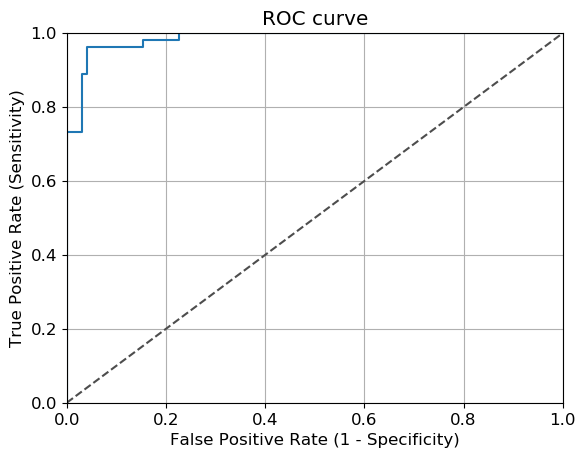

{'F1-Score': 0.9424083769633509, 'ROC AUC Score': 0.9850133638793432}


In [23]:
# 由之前的部分可以知道，我们最终选择的模型是RF随机森林
# RF随机森林
model = RandomForestClassifier(max_depth=6) # max_depth为5时AUC值为0.93，最大深度变为6时提升了整整0.05，并且F1分数也得到了提升
model.fit(X_train, y_train) 
y_predict = model.predict(X_test) 
y_pred_quant = model.predict_proba(X_test)[:, 1] 
y_pred_bin = model.predict(X_test) 
# 调用函数并获取结果
results = evaluate_model_performance(y_test, y_pred_bin,y_pred_quant)
print(results)

[[ 90   7]
 [  4 104]]


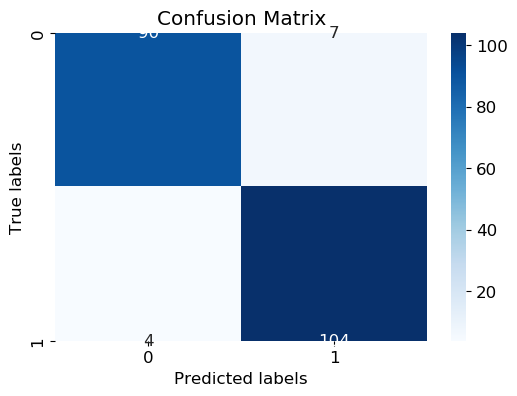

In [30]:
# 混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_bin)
print(conf_matrix)
# 用 Seaborn 来绘制热力图
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [19]:
# 查看第一棵树的状况
# model.estimators_[0] 选择了随机森林模型中的第二棵决策树，将其赋值给变量 estimator。这允许我们单独检查和分析单棵决策树的属性和结构。
estimator = model.estimators_[0]

# 全部属性
# 创建了一个列表 feature_names，其中包含了所有训练集特征（即列名），这些特征将用于后续对树的解释和可视化中。
feature_names = [i for i in X_train.columns]

# 指定数据类型
y_train_str = y_train.astype('str') # 将练集目标变量 y_train 中的数据类型转换为字符串类型
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values # 将 Pandas Series 转换为 Numpy 数组

这段代码用于将决策树的结构导出为图形，并以图像的形式展示。以下是代码的解释：

export_graphviz(estimator, out_file='tree.dot', feature_names=feature_names, class_names=y_train_str, rounded=True, proportion=True, label='root', precision=2, filled=True)：使用 export_graphviz 函数从指定的决策树 estimator 中导出树的结构。参数说明如下：

estimator：指定的决策树模型。
out_file='tree.dot'：指定输出文件的名称为 tree.dot，这是 Graphviz 工具可以处理的一种文件格式。
feature_names=feature_names：指定特征的名称，用于标识每个节点所代表的特征。
class_names=y_train_str：指定类别的名称，用于标识每个节点所代表的类别。
rounded=True：表示节点框是否要呈现为圆角。
proportion=True：表示叶子节点的框中是否包含类别占比的信息。
label='root'：表示根节点的标签。
precision=2：指定显示数字的精度。
filled=True：表示节点框是否要填充颜色。
from subprocess import call：导入 call 函数，用于调用系统命令。

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])：调用 Graphviz 工具的 dot 命令将 tree.dot 文件转换为 PNG 图片。参数说明如下：

'-Tpng'：指定输出格式为 PNG。
'tree.dot'：指定输入文件为 tree.dot。
'-o'：指定输出文件名为 tree.png。
'-Gdpi=600'：指定图像分辨率为 600 DPI。
from IPython.display import Image：导入 Image 类，用于在 Jupyter Notebook 中显示图像。

Image(filename='tree.png')：通过 Image 类加载并显示生成的决策树图像，该图像由 Graphviz 工具生成。这可以在 Jupyter Notebook 中嵌入图像，使用户能够直接在 Notebook 中查看决策树的结构。

In [20]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])



from IPython.display import Image
Image(filename = 'tree.png')

In [21]:
# 创建了一个 PermutationImportance 对象，对特征进行随机排列，并使用测试集来计算每个特征的排列重要性
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test) 

eli5.show_weights(perm, feature_names = X_test.columns.tolist())

# feature_names=X_test.columns.tolist() 指定了特征的名称列表，用于在展示结果中标识每个特征。
# 这个函数会显示每个特征的重要性分数，帮助理解模型中各个特征对于预测的贡献程度。

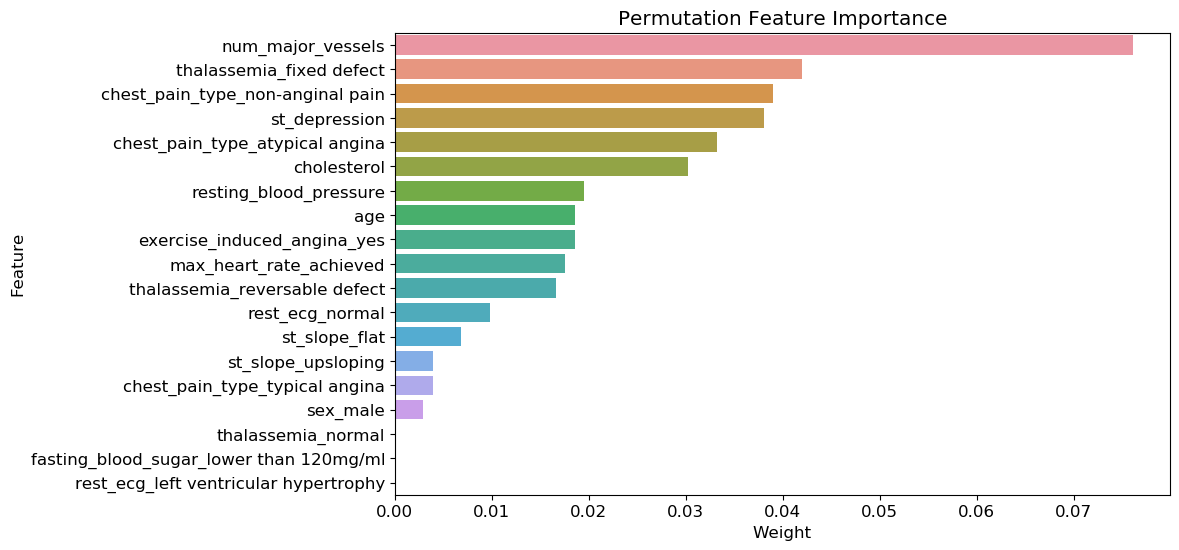

In [31]:
weights_df = eli5.explain_weights_df(perm, feature_names=X_test.columns.tolist())

# 排序特征权重
weights_df_sorted = weights_df.sort_values(by='weight', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='weight', y='feature', data=weights_df_sorted)
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.show()

现在让我们来观察一下，对于模型影响较大的指标，我们主要观察前三个

1.num_major_vessels 主要血管数目
2.thalassemia_fixed_defect 非心绞痛的胸痛类型
3.chest_pain_type_non-anginal pain 固定缺陷的地中海贫血疾病

基于此模型，在对检测对象进行心脏病预测时，我们可以主要对检测对象进行主要血管数目进行检测，以及通过问卷形式或者病例确定胸痛类型以及是否有贫血疾病。但是对于不同类型的胸痛经历，它们对模型的影响程度区别较大，比如typical angina 影响权重仅占0.0039